In [1]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

In [5]:
# Carga de datos.
datos = datasets.load_boston()
# print(datos)
X = datos.data
y = datos.target
print('Dimensiones de X: ', np.shape(X))
print(X)

Dimensiones de X:  (506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [12]:
# Algoritmo de aprendizaje.
reg = linear_model.LinearRegression()

In [13]:
# Métricas de evaluación.
metricas = {
  'MAE':  metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2':   metrics.r2_score}

In [14]:
# Entrenamiento con todos los datos para obtener los coeficientes del modelo.
model = reg.fit(X, y)

In [15]:
# Obtención de los coeficientes del modelo.
w = model.coef_
print(w)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [16]:
# Obtención del término independiente del modelo.
w_0 = model.intercept_
print(w_0)

36.459488385089855


In [17]:
# Validación y obtención de las predicciones del modelo.
y_pred = cross_val_predict(model, X, y, cv = KFold(n_splits=10, random_state=42, shuffle=True))

In [18]:
# Cálculo de las métricas de evaluación.
MAE = metricas['MAE'](y, y_pred)
RMSE = metricas['RMSE'](y, y_pred)
MAPE = metricas['MAPE'](y, y_pred)
R2 = metricas['R2'](y, y_pred)

print('MAE:  %.4f' % MAE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

MAE:  3.3765
RMSE: 4.8342
MAPE: 17.0168
R2:   0.7232


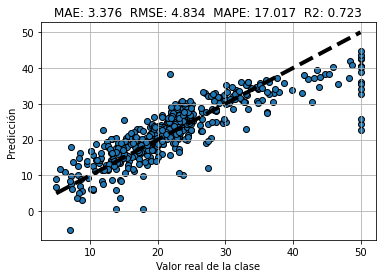

In [19]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f" %
          (MAE,RMSE,MAPE,R2))
plt.grid()
plt.show()